In [2]:
# 3rd Party Imports
import pandas as pd

from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import folium

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import Real Estate Data and Clean (NOTE: Need to Filter for Toronto, ON)

# real_estate1 is house sigma
real_estate1 = pd.read_csv("house_data/housesigma_data_with_coords.csv")
real_estate1 = real_estate1.drop(columns=["Unnamed: 0", "Lat", "Long", "Column_7"], inplace=False)
real_estate1 = real_estate1.rename(columns={'Column_8': 'latitude', 'Column_9': 'longitude'})
geometry = [Point(xy) for xy in zip(real_estate1['longitude'], real_estate1['latitude'])]
real_estate1 = gpd.GeoDataFrame(real_estate1, geometry=geometry, crs="EPSG:4326")
real_estate1.head()

,link,Listed Price,Sold Price,Type,address,latitude,longitude,geometry
0,/on/richmond-hill-real-estate/204-330-red-mapl...,"$600,000","$605,000",Condo Apt,"204 - 330 Red Maple Rd , Richmond Hill - Langs...",43.850877,-79.428248,POINT (-79.42825 43.85088)
1,/on/etobicoke-real-estate/508-40-richview-rd/h...,"$729,888","$680,000",Condo Apt,"508 - 40 Richview Rd , Etobicoke - Humber Heights",43.685146,-79.515954,POINT (-79.51595 43.68515)
2,/on/mississauga-real-estate/1616-50-mississaug...,"$619,900","$595,000",Condo Apt,"1616 - 50 Mississauga Valley Blvd , Mississaug...",43.589720,-79.625824,POINT (-79.62582 43.58972)
3,/on/etobicoke-real-estate/24-wallis-cres/home/...,"$874,999","$815,000",Detached,"24 Wallis Cres , Etobicoke - Mount Olive-Silve...",43.754292,-79.592347,POINT (-79.59235 43.75429)
4,/on/vaughan-real-estate/27-novella-rd/home/b1D...,"$1,198,000","$1,148,000",Semi-Detached,"27 Novella Rd , Vaughan - Patterson",43.840408,-79.487654,POINT (-79.48765 43.84041)


In [4]:
# Import Real Estate Data and Clean (NOTE: Need to Filter for Toronto, ON)

# real_estate2 is realtor
real_estate2 = pd.read_csv("house_data/realtor_with_coords.csv")
geometry = [Point(xy) for xy in zip(real_estate2['long'], real_estate2['lat'])]
real_estate2 = gpd.GeoDataFrame(real_estate2, geometry=geometry, crs="EPSG:4326")
real_estate2.head()

,Unnamed: 0,price,address,mls,office_name,office_type,office_address,Property Type,Building Type,Storeys,...,Other Style,Fireplace Fuel,Utility-Hydro,Other,Age Of Building,Business Type,street address,lat,long,geometry
0,0,"$899,800",50 - 719 LAWRENCE AVENUE WToronto (Yorkdale-Gl...,W10678586,RE/MAX ATRIUM HOME REALTY,Brokerage,"7100 WARDEN AVE #1AMARKHAM, Ontario L3R8B5",Single Family,Row / Townhouse,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,719 lawrence avenue w,43.714933,-79.448608,POINT (-79.44861 43.71493)
1,1,"$888,000",1515 - 8 HILLCREST AVENUEToronto (Willowdale E...,C10650046,HOMELIFE NEW WORLD REALTY INC.,Brokerage,"201 CONSUMERS RD., STE. 205TORONTO, Ontario M2...",Single Family,Apartment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8 hillcrest avenue,43.767937,-79.412160,POINT (-79.41216 43.76794)
2,2,"$639,000",1502 - 10 YORK STREETToronto (Waterfront Commu...,C10640404,RE/MAX REALTRON TNS REALTY INC.,Brokerage,"7800 WOODBINE AVE PHMARKHAM, Ontario L3R2N7",Single Family,Apartment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10 york street,43.641145,-79.381312,POINT (-79.38131 43.64115)
3,3,"$1,139,000",185 RICHARD CLARK DRIVEToronto (Downsview-Rodi...,W10562062,IPRO REALTY LTD.,Brokerage,"3079B DUNDAS ST WESTTORONTO, Ontario M6P1Z9",Single Family,House,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,185 richard clark drive,43.726186,-79.498531,POINT (-79.49853 43.72619)
4,4,"$2,150,000","112 ANNDALE DRIVEToronto (Willowdale East), On...",C10564186,HOMELIFE GOLD PACIFIC REALTY INC.,Brokerage,"3601 VICTORIA PARK AVE #401TORONTO, Ontario M1...",Single Family,House,1.5,...,NaN,NaN,NaN,NaN,NaN,NaN,112 anndale drive,43.762464,-79.399510,POINT (-79.39951 43.76246)


In [5]:
# Import Real Estate Data and Clean (NOTE: Need to Filter for Toronto, ON)

# real_estate3 is zolo
real_estate3 = pd.read_csv("house_data/zolo_with_coords.csv")
geometry = [Point(xy) for xy in zip(real_estate3['long'], real_estate3['lat'])]
real_estate3 = gpd.GeoDataFrame(real_estate3, geometry=geometry, crs="EPSG:4326")
real_estate3.head()

,Unnamed: 0,price,address,rooms,room dimensions,room_properties,Status,Type,Style,Size (sq ft),...,Com_cn_fee,Ceil Height (ft),Ceiling Height,Crane,Industrial Area,Industrial Area Units,Central Vac,lat,long,geometry
0,0,649900,15 Lower Jarvis Street,"['4pc Bathroom', 'Primary Bedroom', 'Den', 'Fo...","['N/A', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A']","['Measurements not available', ""7'10'' x 13'5'...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.645237,-79.369244,POINT (-79.36924 43.64524)
1,1,349900,212 - 234 Albion Road,"['Living', 'Dining', 'Kitchen', 'Prim Bdrm', '...","['4.10 x 6.55', '4.10 x 6.55', '2.48 x 5.21', ...","['Combined W/Dining, Broadloom, W/O To Balcony...",Sale,Condo Apt,Apartment,1000-1199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.721180,-79.544316,POINT (-79.54432 43.72118)
2,2,575000,1408 - 23 Sheppard Avenue E,"['Living', 'Dining', 'Kitchen', 'Prim Bdrm', '...","['3.20 x 4.60', '3.20 x 4.60', '2.50 x 3.35', ...","['Combined W/Dining, Laminate, W/O To Balcony'...",Sale,Condo Apt,Apartment,500-599,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.761240,-79.409004,POINT (-79.409 43.76124)
3,3,429000,1109 - 82 Dalhousie Street,"['Living', 'Dining', 'Kitchen']","['3.20 x 4.65', '3.20 x 4.65', '3.20 x 4.65']","['Combined W/Kitchen, Open Concept', 'Laminate...",Sale,Condo Apt,Apartment,0-499,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.655802,-79.376441,POINT (-79.37644 43.6558)
4,4,399900,1104 - 581 Avenue Road,"['Living', 'Dining', 'Kitchen', 'Br']","['5.82 x 3.15', '3.84 x 2.39', '3.02 x 2.31', ...","['W/O To Balcony, Parquet Floor, Large Window'...",Sale,Co-Op Apt,Apartment,600-699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.689014,-79.401852,POINT (-79.40185 43.68901)


In [6]:
real_estate = pd.concat([real_estate1, real_estate2, real_estate3], ignore_index=True)

In [7]:
#real_estate.to_csv("real_estate.csv")

In [8]:
real_estate = real_estate.drop(columns=["Sold Price"])
real_estate["Listed Price"] = real_estate["price"]
real_estate = real_estate.drop(columns=["price"])
real_estate["Type"] = real_estate["Building Type"]
real_estate['Listed Price'] = real_estate['Listed Price'].replace({'\$': '', ',': ''}, regex=True)
real_estate['Listed Price'] = pd.to_numeric(real_estate['Listed Price'], errors='coerce')



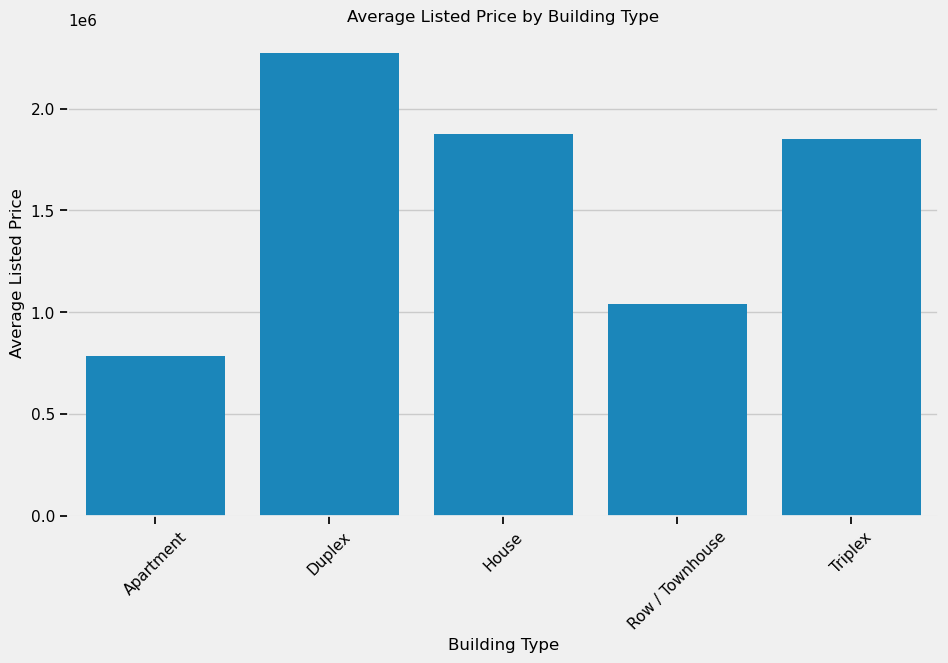

In [9]:
import matplotlib.pyplot as plt

avg_price_by_type = real_estate.groupby("Type")["Listed Price"].mean()

plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_by_type.index, y=avg_price_by_type.values)
plt.xlabel('Building Type')
plt.ylabel('Average Listed Price')
plt.title('Average Listed Price by Building Type')
plt.xticks(rotation=45)
plt.show()

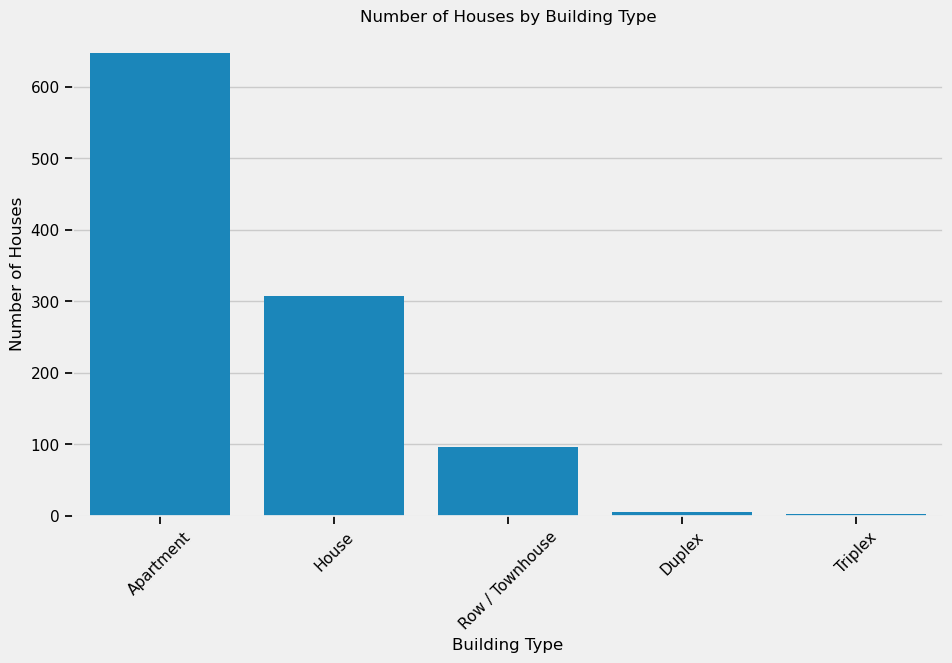

In [12]:
house_type_counts = real_estate['Type'].value_counts()

# Create the bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=house_type_counts.index, y=house_type_counts.values)
plt.xlabel('Building Type')
plt.ylabel('Number of Houses')
plt.title('Number of Houses by Building Type')
plt.xticks(rotation=45)
plt.show()

In [ ]:
"""gdf = gpd.GeoDataFrame(real_estate, geometry='geometry')
gdf = gdf[gdf.is_valid & ~gdf.geometry.is_empty]

# Create the folium map centered around Toronto
m = folium.Map(location=[43.7, -79.42], zoom_start=12)

# Add markers for valid, non-empty geometries
for _, row in gdf.iterrows():
    lat, lon = row['geometry'].y, row['geometry'].x
    folium.Marker([lat, lon]).add_to(m)

m"""